In [ ]:
#importing the dependdencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
data = pd.read_csv('/content/train.csv')  ##reading the csv file 

In [ ]:
data.info()   ###checking the dtypes of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [ ]:
int_data = data.select_dtypes(include='int') ##checking for int data types
obj_data = data.select_dtypes(include='O')
flt_data = data.select_dtypes(include='float') 

In [ ]:
data.isnull().sum()    ##checking for null values in dataset

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

Observation :-We can see there are missing values in arrival delay columns

In [ ]:
data.head(1)  ##visualizing the data set 

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied


In [ ]:
pd.set_option('max_columns' , None)   ## visualizing all the columns of data sets 
data.head()  

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


**Handling the missing Values**

Checking the distribution of arrival delay in minutes

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Arrival Delay in Minutes', ylabel='Density'>

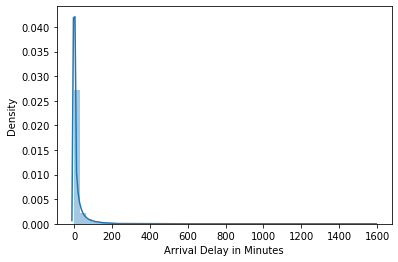

In [ ]:
sns.distplot(data['Arrival Delay in Minutes'])   ##distribution of arrival delay time

<AxesSubplot:>

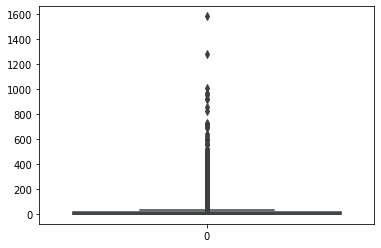

In [ ]:
sns.boxplot(data = data['Arrival Delay in Minutes'])         ##checking for the outliers and there are many outliers

In [ ]:
data['Arrival Delay in Minutes'] = data['Arrival Delay in Minutes'].fillna((data['Arrival Delay in Minutes'].median()))  ##as there are many outliers we are filling the na value with median

Observation ▶ As there are many outliers we are using median to fill missing values.

data[Arrival Delay in Minutes] - mean = 15 and median = 0

**Handling the categorical features**

In [ ]:
obj_data.columns  ##checking the column name of categorical features

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], dtype='object')

In [ ]:
###checking for the unique values in categorical features
for i in obj_data.columns:
  x=data[i].unique()
  print(x)

['Male' 'Female']
['Loyal Customer' 'disloyal Customer']
['Personal Travel' 'Business travel']
['Eco Plus' 'Business' 'Eco']
['neutral or dissatisfied' 'satisfied']


In [ ]:
##using label encoder technique as there are less number unique values for categorical features and Class can be treated as ordinal categorical data.
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [ ]:
for i in obj_data.columns:
  data[i] = label.fit_transform(data[i])
  print('Label encodig is done for {}'.format(i))  

Label encodig is done for Gender
Label encodig is done for Customer Type
Label encodig is done for Type of Travel
Label encodig is done for Class
Label encodig is done for satisfaction


In [ ]:
data.head(5)    ###All the data is now in numerical format

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,1,0,13,1,2,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,1,5047,1,1,25,0,0,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,2,110028,0,0,26,0,0,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,3,24026,0,0,25,0,0,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0
4,4,119299,1,0,61,0,0,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1


In [ ]:
data = data.drop(['Unnamed: 0' , 'id'] , axis=1)

**Handling the Outliers**

The int_data type has 19 columns

In [ ]:
int_data = int_data.drop(['Unnamed: 0','id'] , axis=1) ###droping this features which are not usefull
len(int_data.columns)

17

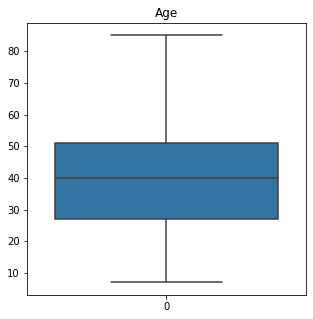

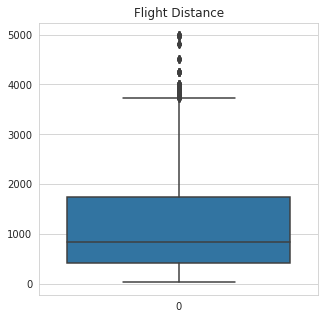

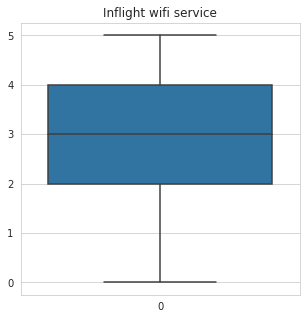

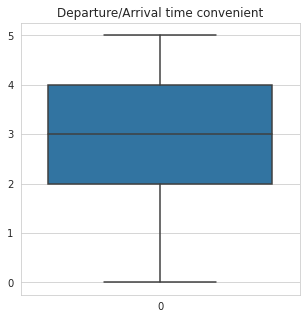

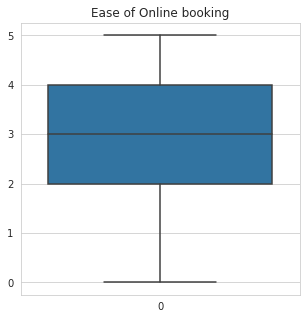

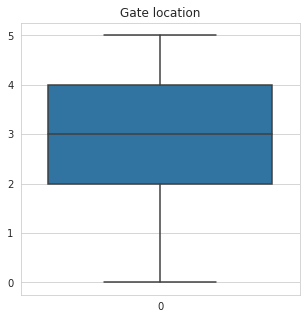

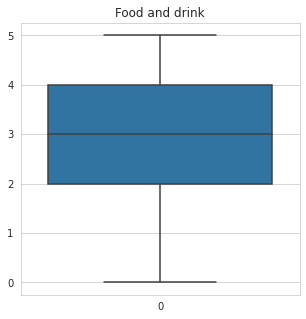

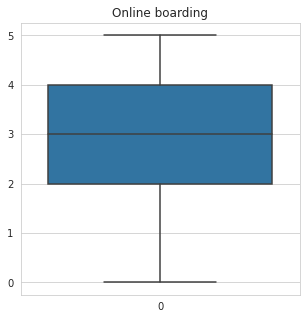

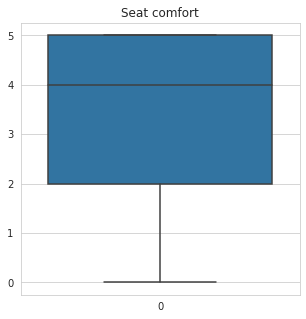

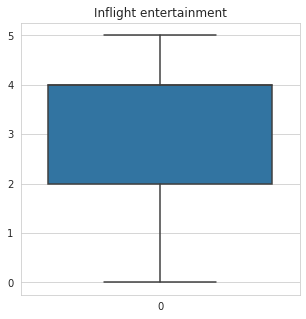

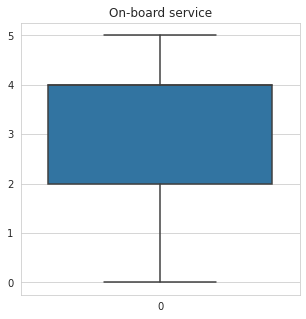

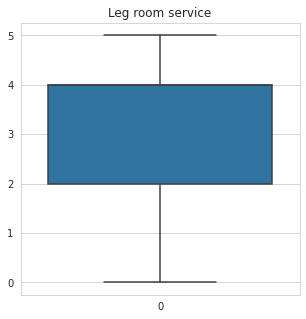

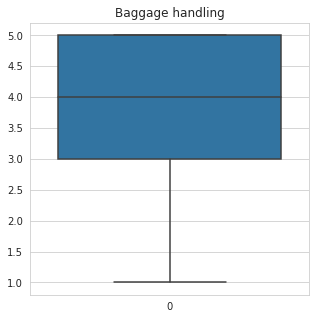

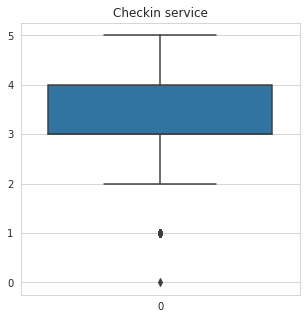

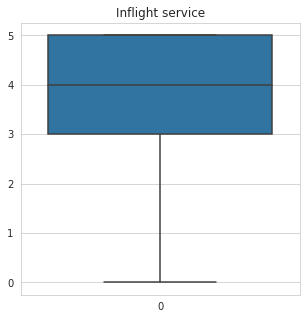

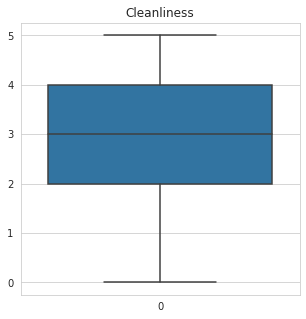

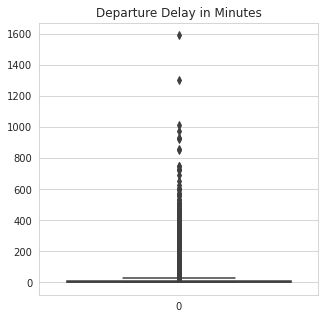

In [ ]:
###plotting the boxplot for checking the outliers
for i in int_data.columns:
  plt.figure(figsize=(5,5))
  plt.title(i)
  sns.set_style("whitegrid")
  sns.boxplot(data = data[i])

Observation ▶ The features Departure Delay in Minutes , Arrival Delay in Minutes , Flight Distance have the most outliers,

**Techniques for Checking the outliers**

🦓 Z score

In [ ]:
### define a threshold value of 3 and mark the datapoints whose absolute value of Z-score is greater than the threshold as outliers
def detect_outlier_zscore(data):    ##making a function with data as parameter
  z_score_outliers = []    
  threshold = 3                    ## creating a threeshold variable a 3
  mean = np.mean(data)            ##taking mean of data
  std = np.std(data)              ##taking standard deviation of data
  for i in data:                   
    z_score = (i-mean)/std         ## zscore of formula 
    if (np.abs(z_score)) > threshold:      ##absolute value of z score
        z_score_outliers.append(i)
  return z_score_outliers
dep_delay_out = detect_outlier_zscore(data['Departure Delay in Minutes'])
print('The total number of outliers from Z score are ',len(dep_delay_out))

The total number of outliers from Z score are  2222


In [ ]:
ariv_delay_out = detect_outlier_zscore(data['Arrival Delay in Minutes'])
print('The total number of outliers from Z score are ',len(ariv_delay_out))

The total number of outliers from Z score are  2225


In [ ]:
flight_dis_out_z = detect_outlier_zscore(data['Flight Distance'])
print('The total number of outliers from Z score are ',len(flight_dis_out_z))

The total number of outliers from Z score are  58


⏹ IQR technique

In [ ]:
def detect_outliers_iqr(data):
    iqr_outliers =[]
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            iqr_outliers.append(i)
    return iqr_outliers
outliers_dep_delay = detect_outliers_iqr(data['Departure Delay in Minutes'])
print('The total number of outliers from IQR are ',len(outliers_dep_delay))

The total number of outliers from IQR are  14529


In [ ]:
outliers_arival_delay = detect_outliers_iqr(data['Arrival Delay in Minutes'])
print('The total number of outliers from IQR are ',len(outliers_arival_delay))

The total number of outliers from IQR are  13954


In [ ]:
flight_dis_out = detect_outliers_iqr(data['Flight Distance'])
print('The total number of outliers from IQR are ',len(flight_dis_out))

The total number of outliers from IQR are  2291


In [ ]:
df = data.copy()

Imputating the outliers with Median value

Selecting the Z score technique for outliers detection as it is not robust to outliers.(I have found many outliers with IQR technique and dont want to use that list of outliers)

In [ ]:
print(data['Arrival Delay in Minutes'].mean() , data['Flight Distance'].mean() , data['Departure Delay in Minutes'].mean())

15.133392362180475 1189.4483754234677 14.815618263012011


In [ ]:
def median_impute(feature , feature_outliers_list):
  median = np.median(data[feature])
  for i in feature_outliers_list:
    data[feature] = np.where(data[feature]==i , median , data[feature])
  print('Outliers are imputed')

In [ ]:
median_impute('Arrival Delay in Minutes' , ariv_delay_out)
median_impute('Flight Distance' ,flight_dis_out_z)
median_impute('Departure Delay in Minutes' , dep_delay_out)

Outliers are imputed
Outliers are imputed
Outliers are imputed


In [ ]:
print(data['Arrival Delay in Minutes'].mean() , data['Flight Distance'].mean() , data['Departure Delay in Minutes'].mean())

10.664478749615029 1187.322374499538 10.410436556821681


All the Outliers are imputed with median value.

**Feature selection**

In [ ]:
data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460.0,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25.0,18.0,0
1,1,1,25,0,0,235.0,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1.0,6.0,0
2,0,0,26,0,0,1142.0,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0.0,0.0,1
3,0,0,25,0,0,562.0,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11.0,9.0,0
4,1,0,61,0,0,214.0,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0.0,0.0,1


In [ ]:
data.shape

(103904, 23)

In [ ]:
categorical_features = [x for x in data.columns if len(data[x].unique()) <=6]
continous_features = [x for x in data.columns if len(data[x].unique())>10]

There are *18* categorical features and *4* continous features and 1 dependent feature.Total **23** features

We can use feature selection techniques to select the features.

Checking the Correlation of features.

In [ ]:
corr = data.corr()

<AxesSubplot:>

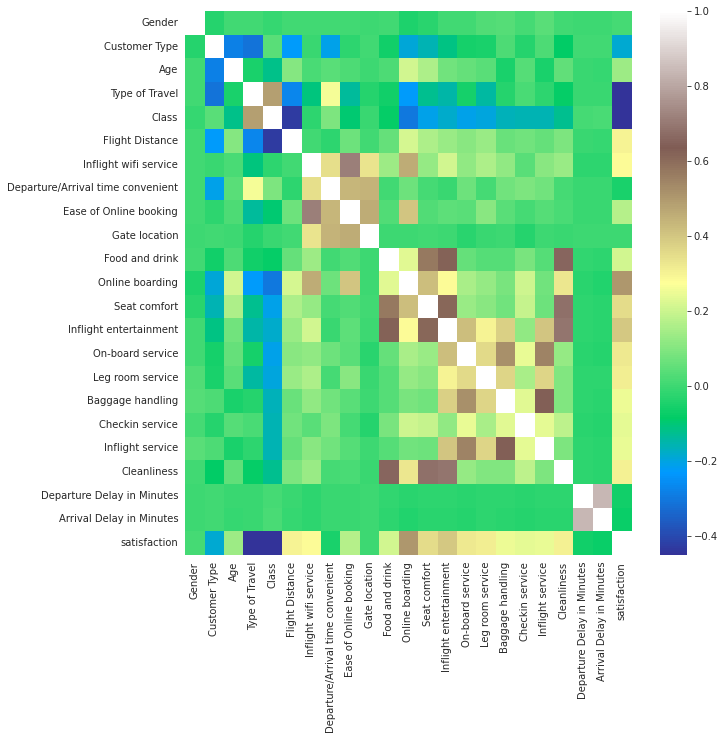

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(corr , cmap='terrain')

 **By the above correlation matrix we can see the relationship between features.**

### **Chi square test** for categorical feature.

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = data[categorical_features]
y = data['satisfaction']

In [ ]:
f_p_values = chi2(X ,y)   ## chi2 returns two values Fscore and P values.

In [ ]:
f_p_values   ###highest the Fscore more important the feature and lower the p value more important is the feature. 

(array([7.86239874e+00, 2.98997606e+03, 1.44457486e+04, 1.36068763e+04,
        5.42233398e+03, 2.10260147e+02, 2.17452495e+03, 2.65017285e-02,
        2.52791323e+03, 1.47619572e+04, 6.41926032e+03, 8.71118195e+03,
        5.29933735e+03, 5.26197662e+03, 2.44881538e+03, 2.80844476e+03,
        2.36294675e+03, 5.07137639e+03, 5.88790000e+04]),
 array([5.04733869e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.20533919e-47, 0.00000000e+00, 8.70681015e-01,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]))

In [ ]:
f_score = pd.Series(f_p_values[0])  ##creating a pandas series for p_values
f_score.index = X.columns   ##seting index equal to X.collumns
f_score  

Gender                                   7.862399
Customer Type                         2989.976064
Type of Travel                       14445.748601
Class                                13606.876336
Inflight wifi service                 5422.333982
Departure/Arrival time convenient      210.260147
Ease of Online booking                2174.524945
Gate location                            0.026502
Food and drink                        2527.913233
Online boarding                      14761.957221
Seat comfort                          6419.260324
Inflight entertainment                8711.181948
On-board service                      5299.337352
Leg room service                      5261.976617
Baggage handling                      2448.815383
Checkin service                       2808.444759
Inflight service                      2362.946754
Cleanliness                           5071.376389
satisfaction                         58879.000000
dtype: float64

In [ ]:
chi_square_features = f_score.sort_index(ascending=True)       ###sorting the p values in ascending order
chi_square_features

Baggage handling                      2448.815383
Checkin service                       2808.444759
Class                                13606.876336
Cleanliness                           5071.376389
Customer Type                         2989.976064
Departure/Arrival time convenient      210.260147
Ease of Online booking                2174.524945
Food and drink                        2527.913233
Gate location                            0.026502
Gender                                   7.862399
Inflight entertainment                8711.181948
Inflight service                      2362.946754
Inflight wifi service                 5422.333982
Leg room service                      5261.976617
On-board service                      5299.337352
Online boarding                      14761.957221
Seat comfort                          6419.260324
Type of Travel                       14445.748601
satisfaction                         58879.000000
dtype: float64

We can select the top 10 features from the above list of feature.

Information gain/Mutual Information for feature selection

In [ ]:
X = data.drop('satisfaction' , axis=1)
y = data['satisfaction']
from sklearn.feature_selection import mutual_info_regression
mutual_info = mutual_info_regression(X,y)  

In [ ]:
mutual_info  ###higer the mutual info more important is the feature

array([0.        , 0.01314568, 0.04574319, 0.11350415, 0.13218908,
       0.06378439, 0.1610883 , 0.00168996, 0.05437733, 0.01195238,
       0.02777726, 0.21631892, 0.07727209, 0.09179663, 0.05980995,
       0.06470882, 0.04217981, 0.03433133, 0.04694109, 0.05834602,
       0.00055377, 0.00743939])

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_information_features = mutual_info.sort_values(ascending=False)

In [ ]:
df_info = pd.DataFrame(mutual_information_features)
df_info['index'] = df_info.index
df_info.reset_index(level=0 , inplace=True)

In [ ]:
df_info

,level_0,0,index
0,Online boarding,0.216319,Online boarding
1,Inflight wifi service,0.161088,Inflight wifi service
2,Class,0.132189,Class
3,Type of Travel,0.113504,Type of Travel
4,Inflight entertainment,0.091797,Inflight entertainment
5,Seat comfort,0.077272,Seat comfort
6,Leg room service,0.064709,Leg room service
7,Flight Distance,0.063784,Flight Distance
8,On-board service,0.059810,On-board service
9,Cleanliness,0.058346,Cleanliness


For the above feature selection technique we can use Information gain and select the number of feature we want.We can also use feature extraction for reducing the dimensions of dataset.

**Linear Feature Extraction**

PCA

In [ ]:
X = data.drop('satisfaction' , axis=1)
y = data['satisfaction']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)  ###for performing the PCA a first step is to Do scaling if the features

StandardScaler()

In [ ]:
scaled_data= scaler.transform(X)

In [ ]:
scaled_data

array([[ 1.01503056, -0.4727667 , -1.7452793 , ...,  1.30586973,
         0.6781826 ,  0.33692206],
       [ 1.01503056,  2.11520819, -0.95136024, ..., -1.74229153,
        -0.4374356 , -0.21424051],
       [-0.98519201, -0.4727667 , -0.88520032, ...,  1.30586973,
        -0.48391969, -0.48982179],
       ...,
       [ 1.01503056,  2.11520819, -0.62056063, ...,  0.54382941,
        -0.15853105,  0.15320121],
       [-0.98519201,  2.11520819, -1.14984   , ..., -1.74229153,
        -0.48391969, -0.48982179],
       [ 1.01503056, -0.4727667 , -0.8190404 , ..., -1.74229153,
        -0.48391969, -0.48982179]])

In [ ]:
from sklearn.decomposition import PCA
scaled_data.shape

(103904, 22)

In [ ]:
pca = PCA(n_components=10)    ###reducing the features from 22 features to 10 features

Principal Component Analysis (PCA) is a popular technique for feature extraction and dimensionality reduction. It involves finding the linear combinations of features that capture the most important patterns or variations in the data. Here's an example of how PCA works:
Step 1: Standardize the Data
Step 2: Compute the Covariance Matrix
Step 3: Compute the Eigenvectors and Eigenvalues
Step 4: Select the Principal Components
Step 5: Transform the Data
Step 6: Visualize the Data


In [ ]:
pca.fit(scaled_data)

PCA(n_components=10)

In [ ]:
x_pca = pca.transform(scaled_data)

In [ ]:
scaled_data.shape

(103904, 22)

In [ ]:
x_pca.shape

(103904, 10)

In [ ]:
selected_features = []
for i in df_info['index']:
  selected_features.append(i)
  if i == 'Baggage handling':
    break

In [ ]:
selected_features

['Online boarding',
 'Inflight wifi service',
 'Class',
 'Type of Travel',
 'Inflight entertainment',
 'Seat comfort',
 'Leg room service',
 'Flight Distance',
 'On-board service',
 'Cleanliness',
 'Ease of Online booking',
 'Inflight service',
 'Age',
 'Baggage handling']

In [ ]:
X = data[selected_features]
y = data['satisfaction']

**Model Building**

Logistic regression

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score , GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

In [ ]:
X_train , X_test , y_train ,y_test=train_test_split(X , y , test_size=0.2 , random_state=42)

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)   
X_test_scaled = scaler.transform(X_test)   ##dont fit the test data 

Logistic Regression Model

In [ ]:
log_model = LogisticRegression()
log_model.fit(X_train_scaled , y_train)
log_y_pred = log_model.predict(X_test_scaled)
log_acc = accuracy_score(log_y_pred , y_test)
log_con = confusion_matrix(log_y_pred , y_test)

The accuracy of log model is 85.65035368846543 %


<AxesSubplot:>

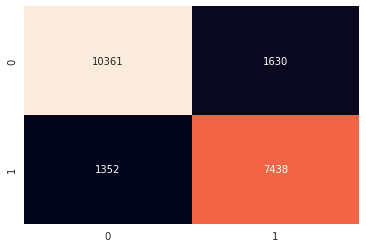

In [ ]:
print('The accuracy of log model is {} %'.format(log_acc*100))
sns.heatmap(log_con , annot=True , cbar=False , fmt='.6g')

In [ ]:
print(log_con)

[[10361  1630]
 [ 1352  7438]]


In [ ]:
X.to_csv('clean.csv')

Cross validation

In [ ]:
cross_score = cross_val_score(log_model , X_train_scaled , y_train , cv=7)

In [ ]:
cross_score

array([0.85793684, 0.85608421, 0.85018947, 0.85465263, 0.85911579,
       0.8565774 , 0.85253495])

Desicion Tree

In [ ]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier()
dtc.fit(X_train_scaled , y_train)
dtc_y_pred = dtc.predict(X_test_scaled)
dtc_score = accuracy_score(dtc_y_pred , y_test)
dtc_con = confusion_matrix(dtc_y_pred , y_test)

The accuracy score for Decission Tree 93.37375487223906 %


<AxesSubplot:>

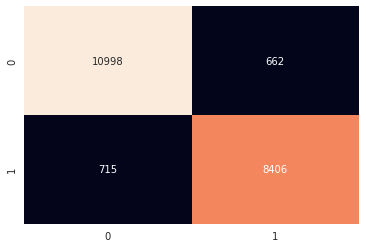

In [ ]:
print('The accuracy score for Decission Tree {} %'.format(dtc_score*100))
sns.heatmap(dtc_con , annot=True , cbar=False , fmt='.6g')

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_scaled , y_train)
rfc_y_pred = rfc.predict(X_test_scaled)
rfc_score = accuracy_score(rfc_y_pred , y_test)
rfc_con = confusion_matrix(y_test , rfc_y_pred)

The accuracy of random forest 95.3226504980511%


<AxesSubplot:>

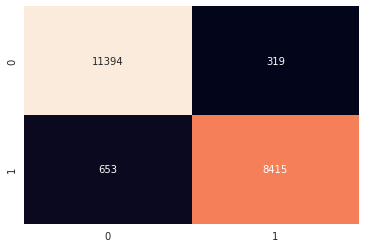

In [ ]:
print('The accuracy of random forest {}%'.format(rfc_score*100))
sns.heatmap(rfc_con  ,annot=True , cbar=False , fmt='.6g')

Hyper parameter tunning for Random forest classifier

In [ ]:
'''
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)
'''

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [ ]:
# grid_search.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 200}

In [ ]:
# grid_search.best_score_

0.9549222741647189

In [ ]:
rfc_hyper = RandomForestClassifier(max_depth = None,
 min_samples_leaf = 1,
 min_samples_split = 5,
 n_estimators = 200)
rfc_hyper.fit(X_train_scaled , y_train)
rfc_hyper_y_pred = rfc_hyper.predict(X_test_scaled)
rfc_hyper_score = accuracy_score(rfc_hyper_y_pred , y_test)
rfc_hyper_con = confusion_matrix(y_test , rfc_hyper_y_pred)


The score after hyper parameter tunning 95.45257687310524 %


<AxesSubplot:>

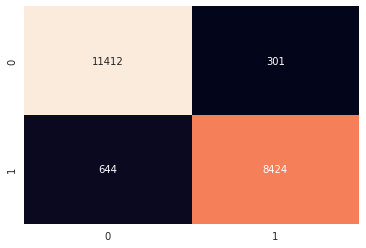

In [ ]:
print('The score after hyper parameter tunning {} %'.format(rfc_hyper_score*100))
sns.heatmap(rfc_hyper_con , annot =True , cbar=False , fmt='.6g')

***Obesrvation-***
LogisticRegression gave us accuracy of 86% , preccision of 82% , and recall of 85%.

Random foreset gave us accuracy of 95% , precission of 96% and recall of 92%.

Even after performing hyper parameter tunning of Random forest accuracy increased slightly.


**Boosting techniques.**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
grad_boost = GradientBoostingClassifier()
grad_boost.fit(X_train_scaled,y_train)
grad_boost_y_pred = grad_boost.predict(X_test_scaled)
grad_boost_score = accuracy_score(grad_boost_y_pred , y_test)
grad_boost_con = confusion_matrix(y_test , grad_boost_y_pred)

The accuracy of boosting is 92.9935999230066 %


<AxesSubplot:>

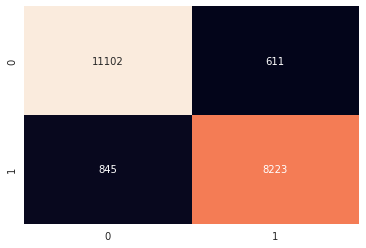

In [ ]:
print('The accuracy of boosting is {} %'.format(grad_boost_score*100))
sns.heatmap(grad_boost_con , annot=True , cbar=False , fmt='.6g')

Artifical Neural Network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU , PReLU , ELU , ReLU
from tensorflow.keras.layers import Dropout

In [ ]:
print(X_train_scaled.shape , X_test_scaled.shape)

(83123, 14) (20781, 14)


In [185]:
input_neuron = 14
first_hidden_neuron_layer = 10 
second_hidden_neuron_layer = 6
third_hidden_neuron_layer = 2
output_neuron = 1
classifier = Sequential()
classifier.add(Dense(units=input_neuron , activation='relu',kernel_initializer='normal'))
classifier.add(Dense(units=first_hidden_neuron_layer , activation=LeakyReLU(alpha=0.01),kernel_initializer='GlorotNormal'))
classifier.add(Dense(units=second_hidden_neuron_layer , activation='relu',kernel_initializer='GlorotUniform'))
classifier.add(Dense(units=third_hidden_neuron_layer , activation=LeakyReLU(alpha=0.01),kernel_initializer='HeNormal'))
classifier.add(Dense(output_neuron,activation='sigmoid',kernel_initializer='HeUniform'))
classifier.compile(optimizer='adam',loss='binary_crossentropy'  ,metrics=['accuracy'])

In [186]:
ann_model_history = classifier.fit(X_train_scaled , y_train , validation_split=0.20 , epochs=10 , batch_size=10)

Epoch 1/10
6650/6650 [==============================] - 16s 2ms/step - loss: 0.2237 - accuracy: 0.9083 - val_loss: 0.1775 - val_accuracy: 0.9287
Epoch 2/10
6650/6650 [==============================] - 15s 2ms/step - loss: 0.1724 - accuracy: 0.9282 - val_loss: 0.1623 - val_accuracy: 0.9338
Epoch 3/10
6650/6650 [==============================] - 16s 2ms/step - loss: 0.1651 - accuracy: 0.9307 - val_loss: 0.1604 - val_accuracy: 0.9352
Epoch 4/10
6650/6650 [==============================] - 16s 2ms/step - loss: 0.1600 - accuracy: 0.9338 - val_loss: 0.1540 - val_accuracy: 0.9364
Epoch 5/10
6650/6650 [==============================] - 16s 2ms/step - loss: 0.1565 - accuracy: 0.9353 - val_loss: 0.1514 - val_accuracy: 0.9366
Epoch 6/10
6650/6650 [==============================] - 15s 2ms/step - loss: 0.1532 - accuracy: 0.9356 - val_loss: 0.1508 - val_accuracy: 0.9362
Epoch 7/10
6650/6650 [==============================] - 14s 2ms/step - loss: 0.1503 - accuracy: 0.9370 - val_loss: 0.1466 - val_ac

In [169]:
## Early stopping if accuracy is not increasing to stop the training
import tensorflow
early_stop = tensorflow.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [187]:
ann_model_history = classifier.fit(X_train_scaled , y_train , validation_split=0.20 , epochs=30 , batch_size=10 , callbacks=early_stop)

Epoch 1/30
6650/6650 [==============================] - 15s 2ms/step - loss: 0.1432 - accuracy: 0.9407 - val_loss: 0.1408 - val_accuracy: 0.9422
Epoch 2/30
6650/6650 [==============================] - 14s 2ms/step - loss: 0.1423 - accuracy: 0.9410 - val_loss: 0.1413 - val_accuracy: 0.9425
Epoch 3/30
6650/6650 [==============================] - 14s 2ms/step - loss: 0.1415 - accuracy: 0.9409 - val_loss: 0.1407 - val_accuracy: 0.9414
Epoch 4/30
6650/6650 [==============================] - 15s 2ms/step - loss: 0.1416 - accuracy: 0.9413 - val_loss: 0.1402 - val_accuracy: 0.9441
Epoch 5/30
6650/6650 [==============================] - 15s 2ms/step - loss: 0.1396 - accuracy: 0.9419 - val_loss: 0.1397 - val_accuracy: 0.9408
Epoch 6/30
6650/6650 [==============================] - 14s 2ms/step - loss: 0.1390 - accuracy: 0.9425 - val_loss: 0.1389 - val_accuracy: 0.9441
Epoch 7/30
6650/6650 [==============================] - 15s 2ms/step - loss: 0.1386 - accuracy: 0.9427 - val_loss: 0.1369 - val_ac

In [191]:
ann_y_pred = classifier.predict(X_test_scaled)

650/650 [==============================] - 1s 2ms/step


In [196]:
ann_y_pred = (ann_y_pred>=0.5)
ann_score = accuracy_score(ann_y_pred , y_test)
ann_con = confusion_matrix(y_test,ann_y_pred)

The accuracy of ANN model 94.42760213656706 %


<AxesSubplot:>

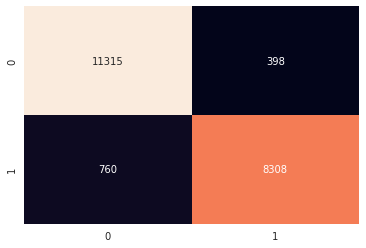

In [197]:
print('The accuracy of ANN model {} %'.format(ann_score*100))
sns.heatmap(ann_con , annot=True , cbar=False, fmt='.6g')

In [199]:
!pip install catboost
import catboost as cb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 11.8 MB/s eta 0:00:00


In [200]:
cat_model = cb.CatBoostClassifier(iterations=100, # Number of boosting iterations to perform
    learning_rate=0.1,         # Learning rate for gradient boosting
    depth=6                # Maximum depth of the decision trees 
    )
cat_model.fit(X_train_scaled,y_train)
y_cat_pred = cat_model.predict(X_test_scaled)
cat_score = accuracy_score(y_cat_pred , y_test)
cat_con = confusion_matrix(y_test , y_cat_pred)

0:	learn: 0.6267192	total: 58.3ms	remaining: 5.77s
1:	learn: 0.5731067	total: 69.5ms	remaining: 3.41s
2:	learn: 0.5290095	total: 92.1ms	remaining: 2.98s
3:	learn: 0.4897968	total: 104ms	remaining: 2.5s
4:	learn: 0.4562078	total: 114ms	remaining: 2.17s
5:	learn: 0.4267130	total: 124ms	remaining: 1.94s
6:	learn: 0.4020932	total: 134ms	remaining: 1.77s
7:	learn: 0.3810645	total: 143ms	remaining: 1.65s
8:	learn: 0.3605078	total: 170ms	remaining: 1.72s
9:	learn: 0.3435406	total: 203ms	remaining: 1.83s
10:	learn: 0.3282591	total: 235ms	remaining: 1.9s
11:	learn: 0.3149913	total: 270ms	remaining: 1.98s
12:	learn: 0.3026401	total: 294ms	remaining: 1.97s
13:	learn: 0.2907372	total: 321ms	remaining: 1.97s
14:	learn: 0.2809915	total: 354ms	remaining: 2s
15:	learn: 0.2727345	total: 386ms	remaining: 2.03s
16:	learn: 0.2646585	total: 419ms	remaining: 2.04s
17:	learn: 0.2572729	total: 447ms	remaining: 2.04s
18:	learn: 0.2508356	total: 484ms	remaining: 2.06s
19:	learn: 0.2448311	total: 510ms	remaining

The accuracy of cat score is 0.9439391752081228 %


<AxesSubplot:>

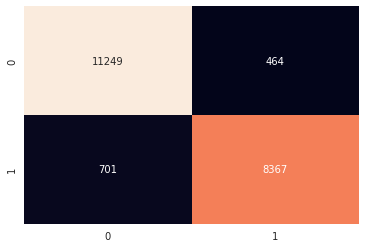

In [201]:
print('The accuracy of cat score is {} %'.format(cat_score))
sns.heatmap(cat_con , annot=True , cbar=False , fmt='.6g')

We are choosing random forest for model building.

In [202]:
import pickle
filename = 'random_model.sav'
pickle.dump(rfc_hyper , open(filename , 'wb'))